<a href="https://colab.research.google.com/github/iainwo/life-of-iain/blob/main/0_1_1_method_of_exhaustion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Basic Concepts of Calc

1. measure the area of a region
2. measure steepness of line

# The Area of a Region Can Be Measured Using the Method of Exhaustion

Historical method by greeks, consisting of:

1. find a region to measure
2. approximate the region of #1 with a easily measured polygon
3. improve the approximation by increasing the number of sides on the polygon
4. repeat

# Claim - The Area Under a Parabolic Segment is Exactly: $A = \frac{b^3}{3}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# number of points
x_lb = 0
x_ub = 10
n = 11

# parabola
f = lambda x: x**2
x = np.linspace(x_lb, x_ub, n)
y = f(x)

# ordinates
xi = np.full((n), x_ub//2)
ordinate_i = np.linspace(x_lb, f(xi[-1]), n)

xj = np.full((n), x_ub)
ordinate_j = np.linspace(0, f(xj[-1]), n)

# region approximations
f_lb = lambda x: np.power(np.floor(x), 2) # lower bound
y_lb = f_lb(x)

f_ub = lambda x: np.ceil(x)**2 # upper bound
y_ub = f_ub(x)

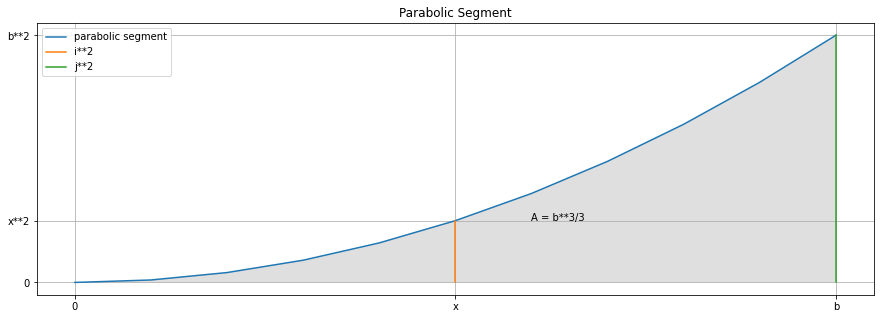

In [34]:
plt.figure(figsize=(15, 5))

plt.plot(x, y, label="parabolic segment")
plt.fill_between(x, y, alpha=0.25, facecolor="gray")
plt.plot(xi, ordinate_i, label="i**2")
plt.plot(xj, ordinate_j, label="j**2")
plt.text(1 + xi[0], ordinate_i[-1], "A = b**3/3")
plt.xticks([0, xi[0], xj[0]], ["0", "x", "b"])
plt.yticks([0, ordinate_i[-1], ordinate_j[-1]], ["0", "x**2", "b**2"])
plt.title("Parabolic Segment")
plt.grid(True)
plt.legend()

plt.show()

# Reason - the Method of Exhaustion show that the Area Under a Parabolic Segment is $A = \frac{b^3}{3}$

## STEP 1 - find a region to measure

This region is defined by the area underneath the parabolic segment defined in "Claim - The Area Under a Parabolic Segment is Exactly: $A = \frac{b^3}{3}$"

## STEP 2  approximate the region with a easily measured polygon

### Visualizing the Approximations

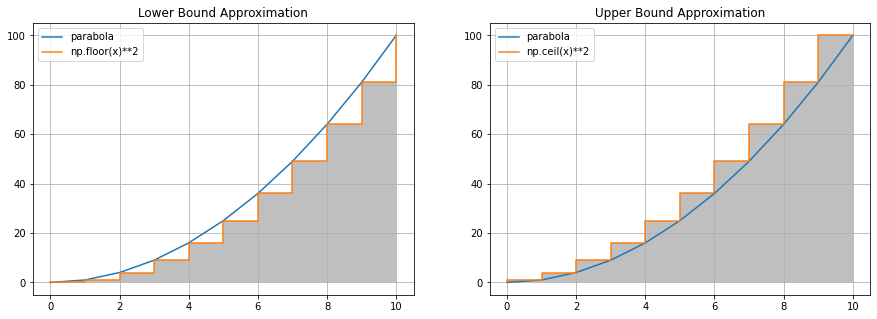

In [35]:
afig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Parabolic Segments')

# lower bound region approximation
ax[0].plot(x, y, label="parabola")
ax[0].plot(x, y_lb, label="np.floor(x)**2", drawstyle='steps-post')
ax[0].set_title("Lower Bound Approximation")
ax[0].fill_between(x, y_lb, alpha=0.5, facecolor="gray", step="post")
ax[0].grid(True)
ax[0].legend()

# upper bound region approximation
ax[1].plot(x, y, label="parabola")
ax[1].plot(x, y_ub, label="np.ceil(x)**2", drawstyle='steps-pre')
ax[1].set_title("Upper Bound Approximation")
ax[1].fill_between(x, y_ub, alpha=0.5, facecolor="gray", step="pre")
ax[1].grid(True)
ax[1].legend()

plt.show()

### Quantifying the "Easily Measured"  Approximations

The lower and upper bound step function approixmations can be broken into rectangular pieces, reasoned about, and then ultimately used to form a measurement of the approximation's area.

In [ ]:
step = (x_ub//10)

# rectangle 2
x_r1 = x[step: 3*step]
y_r1 = f_ub(x_r1)

# rectangle 3
x_r2 = x[3*step: 5*step]
y_r2 = f_ub(x_r2)

# rectangle 1
x_r3 = x[8*step: 10*step]
y_r3 = f_ub(x_r3)

In [ ]:
# create logical axis
x_log = np.linspace(x_lb, x_ub, n)
x_log_labels = [f"{i:.0f}i/n" for i in x_log]

y_log = f(x_log)
y_log_labels = [f"({i:.0f}i/n)**2" for i in x_log]

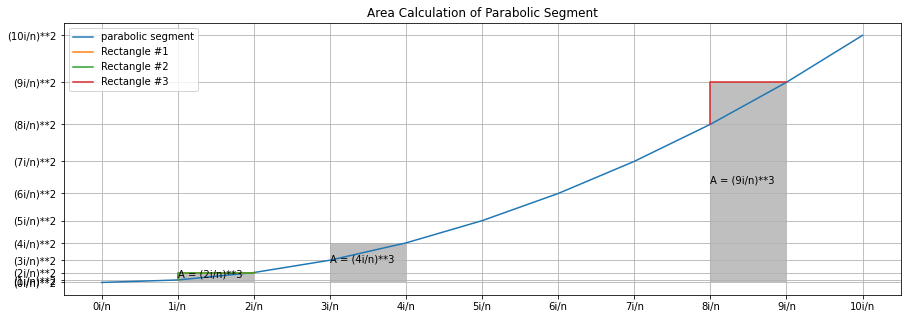

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="parabolic segment")

# rectangle 1
plt.plot(x_r1, y_r1, label="Rectangle #1", drawstyle='steps-pre')
plt.fill_between(x_r1, y_r1, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r1[0], y_r1[-1]//2, "A = (2i/n)**3")

# rectangle 2
plt.plot(x_r1, y_r1, label="Rectangle #2", drawstyle='steps-pre')
plt.fill_between(x_r2, y_r2, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r2[0], y_r2[-1]//2, "A = (4i/n)**3")

# rectangle 3
plt.plot(x_r3, y_r3, label="Rectangle #3", drawstyle='steps-pre')
plt.fill_between(x_r3, y_r3, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r3[0], y_r3[-1]//2, "A = (9i/n)**3")

plt.xticks(x_log, x_log_labels)
plt.yticks(y_log, y_log_labels)

plt.title("Area Calculation of Parabolic Segment")
plt.grid(True)
plt.legend()
plt.show()